## We start by importing the necessary libraries for the EDA

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### Now we load the clean data from the previous process

In [2]:
df = pd.read_csv("data-cleaned.csv")
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Now let's visualise the data using MatPlotLib
##### First, we compare the number of customers who churnned or not with their tenure with the company

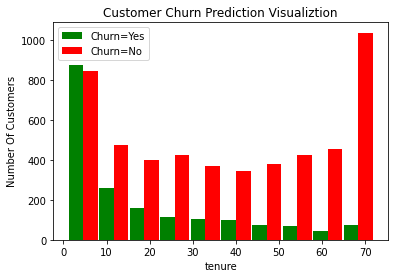

In [3]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [8]:
df_copy = df.copy()

In [52]:
df_gender = df_copy[df_copy.Churn=="Yes"].groupby('gender').size()

##### - Which gender churned the most?

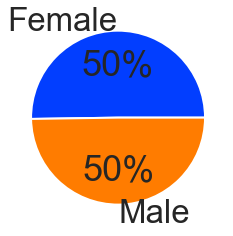

In [53]:
labels = ['Female','Male']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]
sns.set_theme(context='poster', palette="dark", font="arial", font_scale= 1.5)

#create pie chart
plt.pie(df_gender, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

#### Let's plot the number of churnned customers and their monthly charges

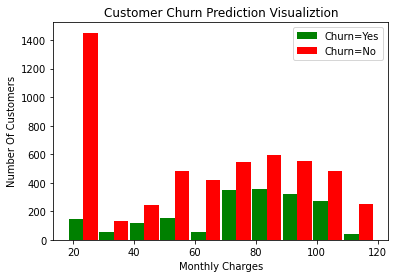

In [4]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

##### - Tenure of the churned customers from more to less

In [75]:
df2 = df_copy[df_copy.Churn == 'Yes']
df3 = df2['tenure'].value_counts(ascending=False).reset_index()

df3.head(72)

,index,tenure
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
...,...,...
67,45,6
68,72,6
69,62,5
70,63,4


<AxesSubplot:xlabel='index', ylabel='tenure'>

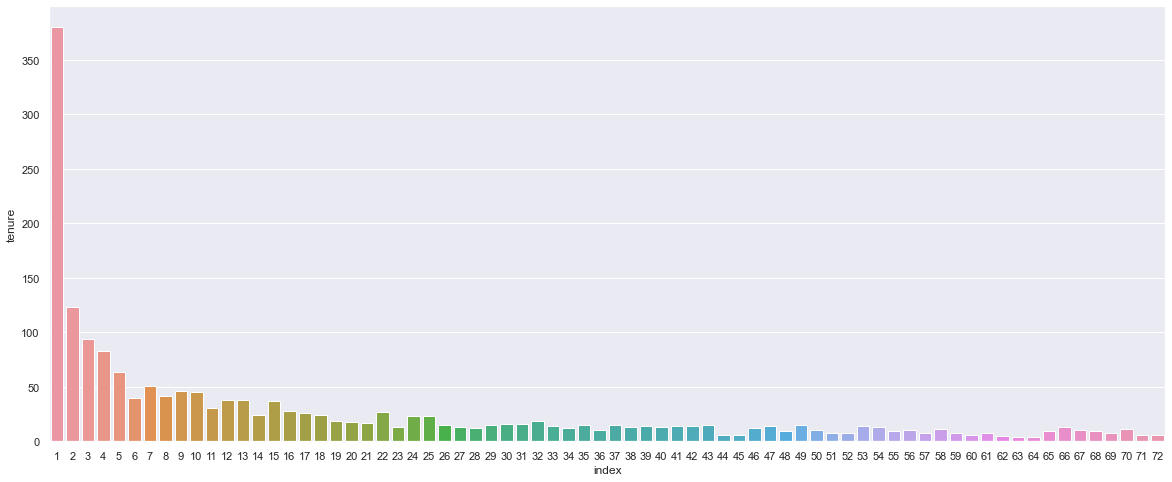

In [80]:
sns.set_theme(context='notebook', palette="dark", font="arial", font_scale= 1)
plt.figure(figsize=(20,8))
sns.barplot(data = df3,x = 'index',y = 'tenure')

##### - The most common service among churned customers

##### - Money lost by losing the churned customers

##### - Percentage of churned customers with DSL internet service

##### - Percentage of churned customers with Fiber Optic internet service

##### - What is the percentage of churned customers among the top 100 Total charged customers

##### - What is the percentage of churned customers among the top 100 monthly charged customers

#### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [5]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [6]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [7]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)